In [1]:
import numpy as np

In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

/scratch/cluster/piti/miniconda/envs/loading_models/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!export HF_HOME=/scratch/cluster/piti/hf_cache

In [3]:
# Load models (replace with your actual model paths/names)
model_before = AutoModelForCausalLM.from_pretrained("cleanrl/EleutherAI_pythia-1b-deduped__sft__tldr", trust_remote_code=True)

In [4]:
model_after = AutoModelForCausalLM.from_pretrained("policy")   

In [8]:
model_before

GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 2048)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-15): 16 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXAttention(
          (query_key_value): Linear(in_features=2048, out_features=6144, bias=True)
          (dense): Linear(in_features=2048, out_features=2048, bias=True)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=2048, out_features=8192, bias=True)
          (dense_4h_to_h): Linear(in_features=8192, out_features=2048, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (final_layer_norm): LayerNorm((2048,), eps=1e-05, 

In [7]:
model_after

GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 2048)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-15): 16 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXAttention(
          (query_key_value): Linear(in_features=2048, out_features=6144, bias=True)
          (dense): Linear(in_features=2048, out_features=2048, bias=True)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=2048, out_features=8192, bias=True)
          (dense_4h_to_h): Linear(in_features=8192, out_features=2048, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (final_layer_norm): LayerNorm((2048,), eps=1e-05, 

In [8]:
def compare_weights_histograms(model_before, model_after, max_layers=20, bins=100):
    for i, ((name1, param1), (name2, param2)) in enumerate(zip(model_before.named_parameters(), model_after.named_parameters())):
        if name1 != name2:
            print(f"Layer mismatch: {name1} vs {name2}")
            continue
        if i >= max_layers:  # Limit for large models
            break
        w1 = param1.detach().cpu().numpy().flatten()
        w2 = param2.detach().cpu().numpy().flatten()
        diff = np.abs(w2 - w1)
        print(f"{name1}: Mean absolute diff = {diff.mean():.6f}")
        # Plot histogram
        plt.figure(figsize=(6, 3))
        plt.hist(diff, bins=bins, color="blue", alpha=0.7)
        plt.title(f"Weight Differences: {name1}")
        plt.xlabel("Absolute Difference")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()


The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
gpt_neox.embed_in.weight: Mean absolute diff = 0.000000


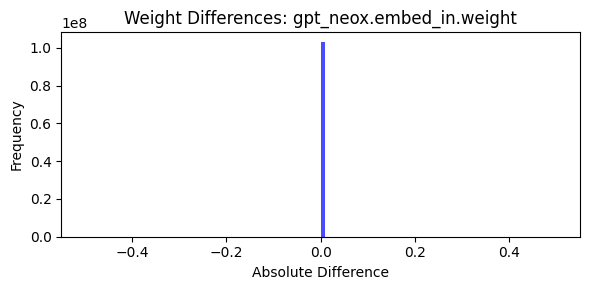

gpt_neox.layers.0.input_layernorm.weight: Mean absolute diff = 0.000000


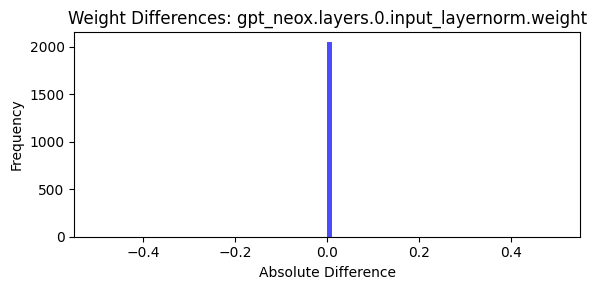

gpt_neox.layers.0.input_layernorm.bias: Mean absolute diff = 0.000000


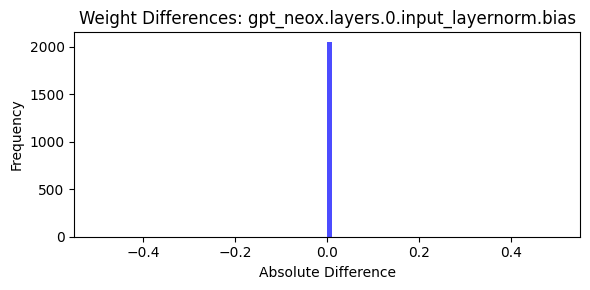

gpt_neox.layers.0.post_attention_layernorm.weight: Mean absolute diff = 0.000000


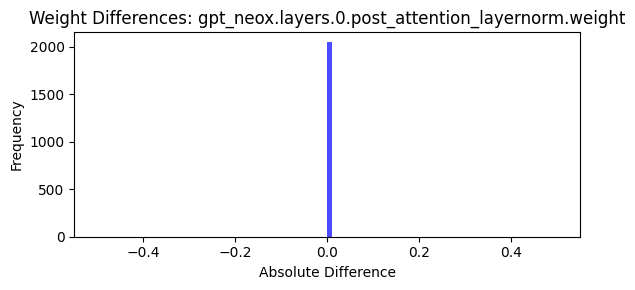

gpt_neox.layers.0.post_attention_layernorm.bias: Mean absolute diff = 0.000000


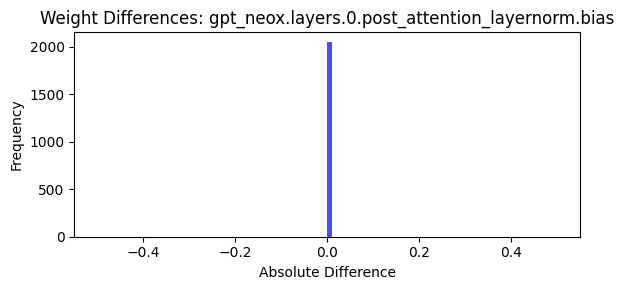

gpt_neox.layers.0.attention.query_key_value.weight: Mean absolute diff = 0.000000


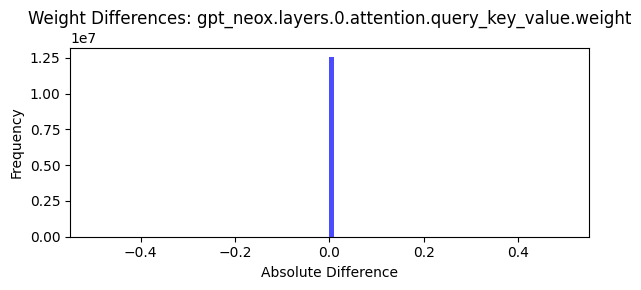

gpt_neox.layers.0.attention.query_key_value.bias: Mean absolute diff = 0.000000


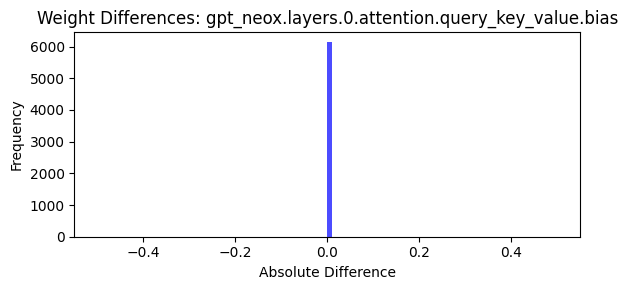

gpt_neox.layers.0.attention.dense.weight: Mean absolute diff = 0.000000


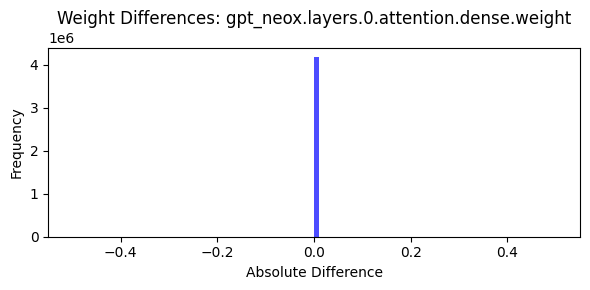

gpt_neox.layers.0.attention.dense.bias: Mean absolute diff = 0.000000


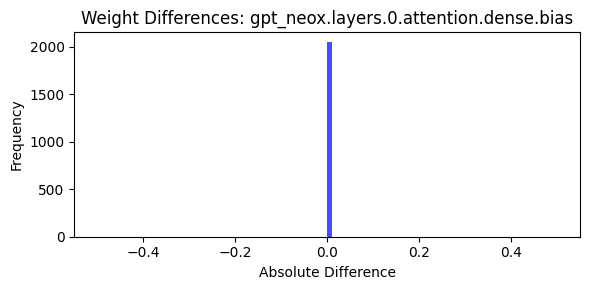

gpt_neox.layers.0.mlp.dense_h_to_4h.weight: Mean absolute diff = 0.000000


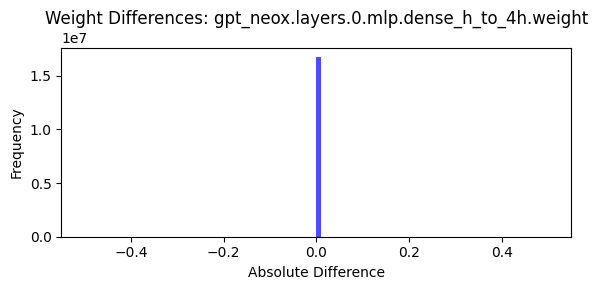

gpt_neox.layers.0.mlp.dense_h_to_4h.bias: Mean absolute diff = 0.000000


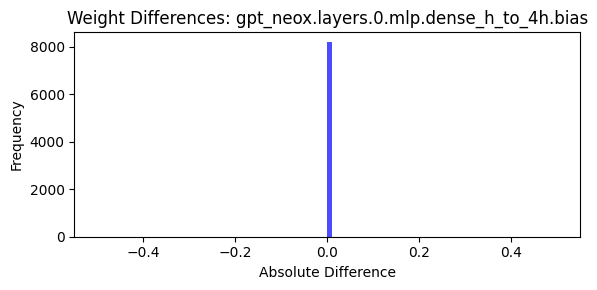

gpt_neox.layers.0.mlp.dense_4h_to_h.weight: Mean absolute diff = 0.000000


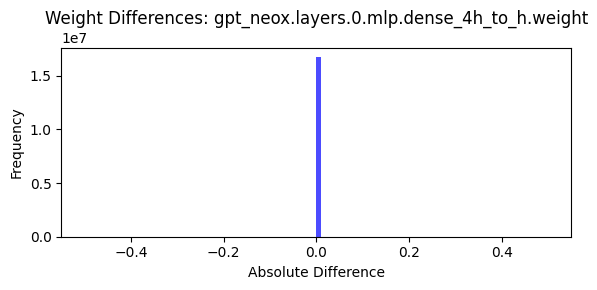

gpt_neox.layers.0.mlp.dense_4h_to_h.bias: Mean absolute diff = 0.000000


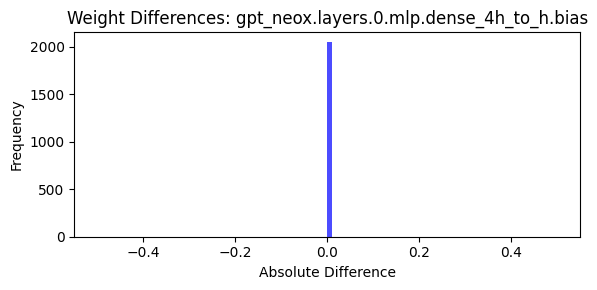

gpt_neox.layers.1.input_layernorm.weight: Mean absolute diff = 0.000000


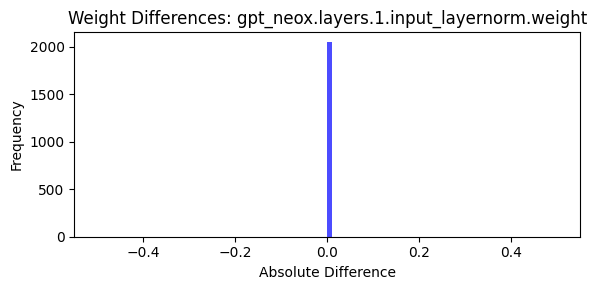

gpt_neox.layers.1.input_layernorm.bias: Mean absolute diff = 0.000000


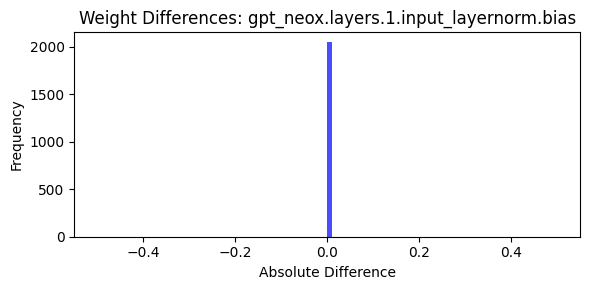

gpt_neox.layers.1.post_attention_layernorm.weight: Mean absolute diff = 0.000000


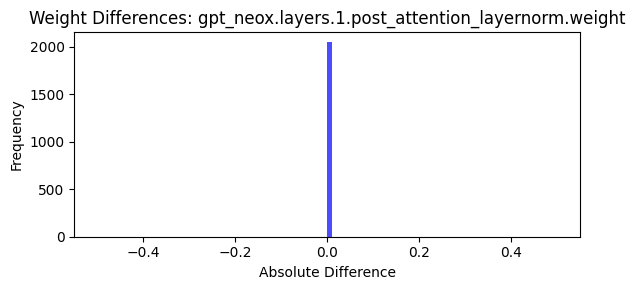

gpt_neox.layers.1.post_attention_layernorm.bias: Mean absolute diff = 0.000000


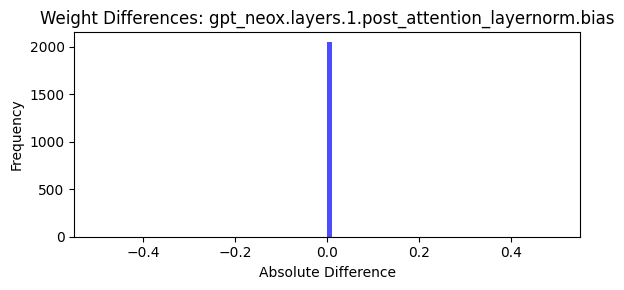

gpt_neox.layers.1.attention.query_key_value.weight: Mean absolute diff = 0.000000


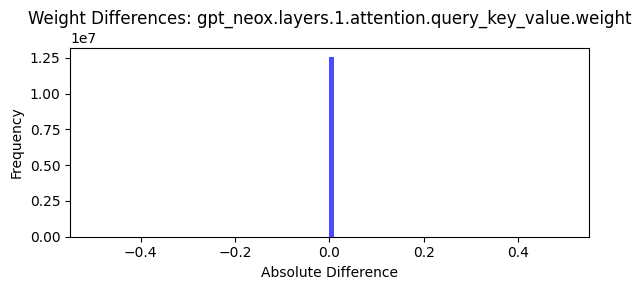

gpt_neox.layers.1.attention.query_key_value.bias: Mean absolute diff = 0.000000


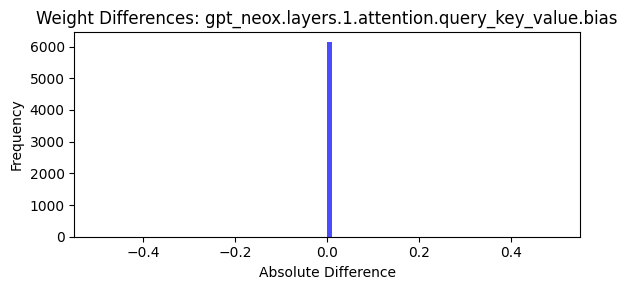

gpt_neox.layers.1.attention.dense.weight: Mean absolute diff = 0.000000


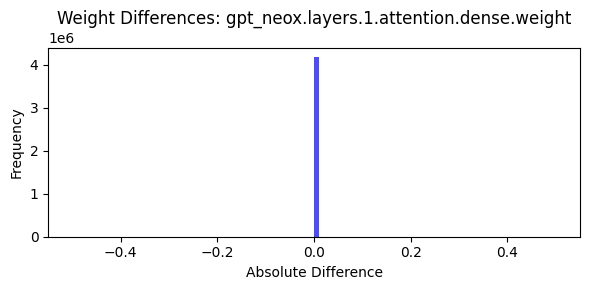

In [9]:
compare_weights_histograms(model_before, model_after, max_layers=20)

In [10]:
def pca_weights_visualization(model_before, model_after, max_layers=20, sample_size=10000):
    weights_before, weights_after = [], []
    actual_sample_size = sample_size  # Will adjust if any layer is smaller
    for i, ((_, param1), (_, param2)) in enumerate(zip(model_before.named_parameters(), model_after.named_parameters())):
        if i >= max_layers:
            break
        w1 = param1.detach().cpu().numpy().flatten()
        w2 = param2.detach().cpu().numpy().flatten()
        # Find the largest possible sample size for this layer
        min_len = min(len(w1), len(w2), sample_size)
        actual_sample_size = min(actual_sample_size, min_len)
        idx1 = np.linspace(0, len(w1) - 1, min_len).astype(int)
        idx2 = np.linspace(0, len(w2) - 1, min_len).astype(int)
        weights_before.append(w1[idx1])
        weights_after.append(w2[idx2])
    # Now ensure all arrays are the same length (actual_sample_size)
    weights_before = [w[:actual_sample_size] for w in weights_before]
    weights_after = [w[:actual_sample_size] for w in weights_after]
    X = np.vstack(weights_before + weights_after)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    n = len(weights_before)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:n, 0], X_pca[:n, 1], color='blue', alpha=0.6, label='Before')
    plt.scatter(X_pca[n:, 0], X_pca[n:, 1], color='red', alpha=0.6, label='After')
    plt.title("PCA of Layer Weights (Sampled and Matched Length)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.tight_layout()
    plt.show()

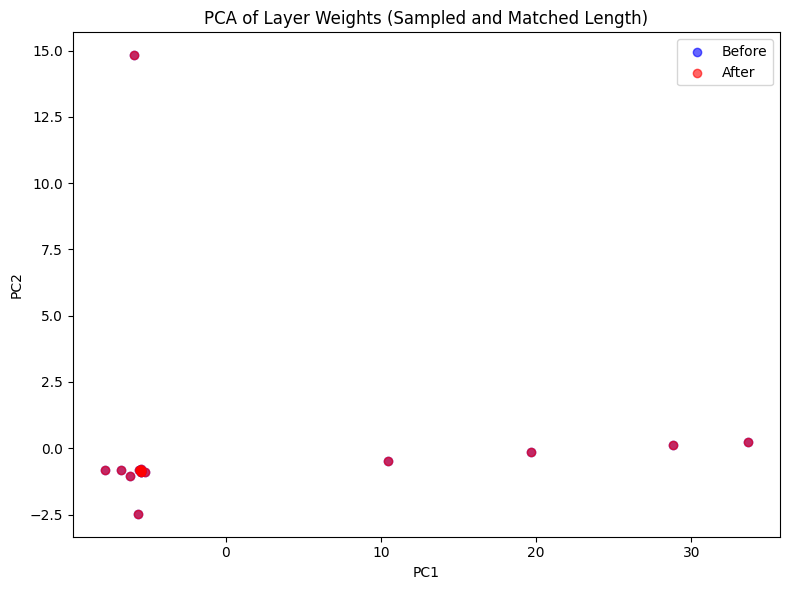

In [16]:
pca_weights_visualization(model_before, model_after, max_layers=20, sample_size=10000)

In [1]:
import os
print("HF_HOME =", os.getenv("HF_HOME"))

HF_HOME = /scratch/cluster/piti/hf_cache


In [4]:
before_value_model = AutoModelForSequenceClassification.from_pretrained("cleanrl/EleutherAI_pythia-1b-deduped__reward__tldr", trust_remote_code=True)

In [5]:
after_value_model = AutoModelForSequenceClassification.from_pretrained("value_model")

In [6]:
after_value_model

GPTNeoXForSequenceClassification(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 2048)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-15): 16 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXAttention(
          (query_key_value): Linear(in_features=2048, out_features=6144, bias=True)
          (dense): Linear(in_features=2048, out_features=2048, bias=True)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=2048, out_features=8192, bias=True)
          (dense_4h_to_h): Linear(in_features=8192, out_features=2048, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (final_layer_norm): LayerNorm((2048,

gpt_neox.embed_in.weight: Mean absolute diff = 0.000007


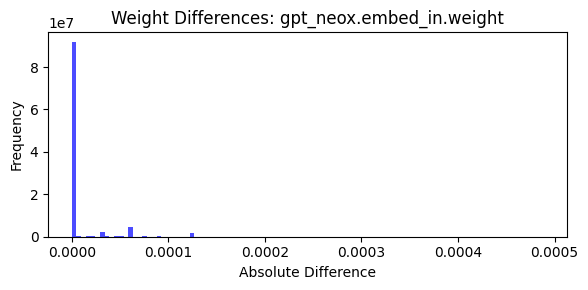

gpt_neox.layers.0.input_layernorm.weight: Mean absolute diff = 0.000000


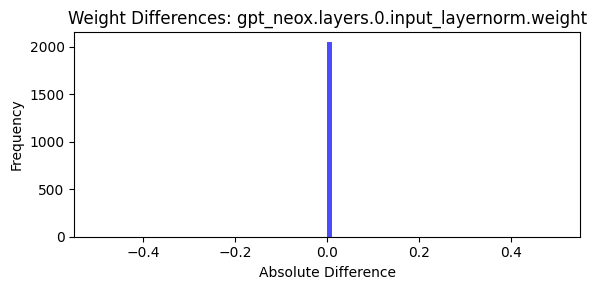

gpt_neox.layers.0.input_layernorm.bias: Mean absolute diff = 0.000010


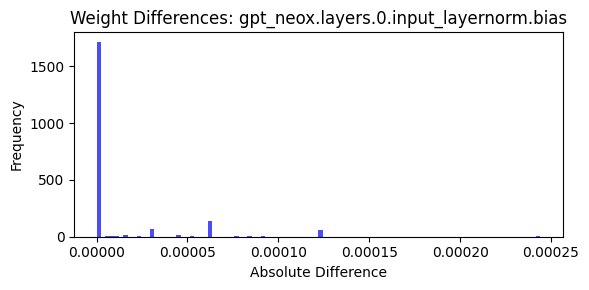

gpt_neox.layers.0.post_attention_layernorm.weight: Mean absolute diff = 0.000000


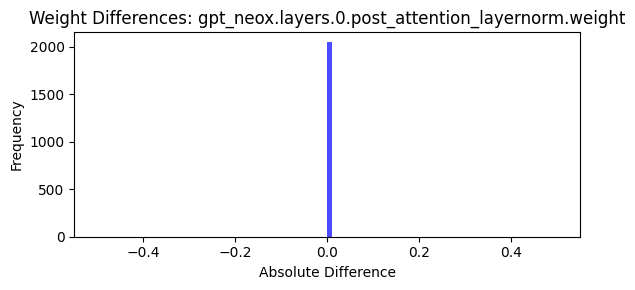

gpt_neox.layers.0.post_attention_layernorm.bias: Mean absolute diff = 0.000019


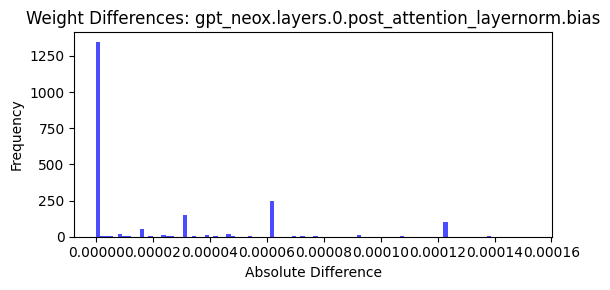

gpt_neox.layers.0.attention.query_key_value.weight: Mean absolute diff = 0.000027


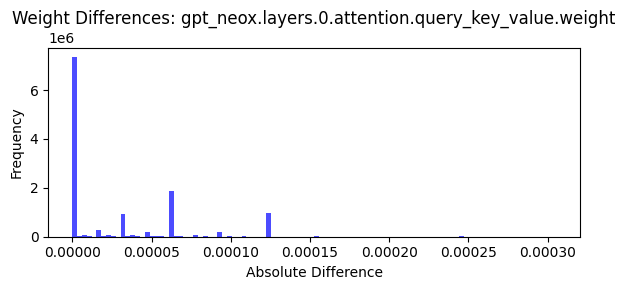

gpt_neox.layers.0.attention.query_key_value.bias: Mean absolute diff = 0.000017


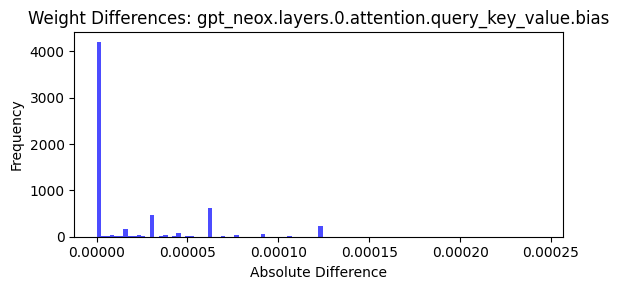

gpt_neox.layers.0.attention.dense.weight: Mean absolute diff = 0.000031


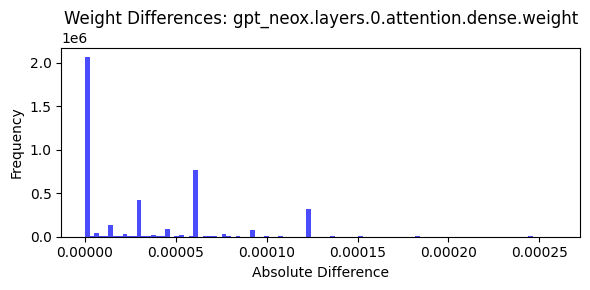

gpt_neox.layers.0.attention.dense.bias: Mean absolute diff = 0.000016


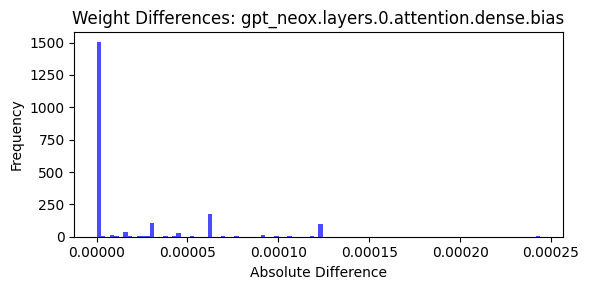

gpt_neox.layers.0.mlp.dense_h_to_4h.weight: Mean absolute diff = 0.000027


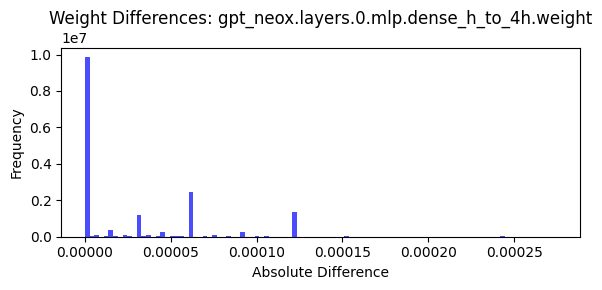

gpt_neox.layers.0.mlp.dense_h_to_4h.bias: Mean absolute diff = 0.000008


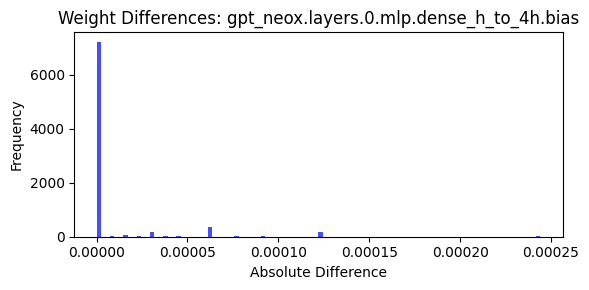

gpt_neox.layers.0.mlp.dense_4h_to_h.weight: Mean absolute diff = 0.000029


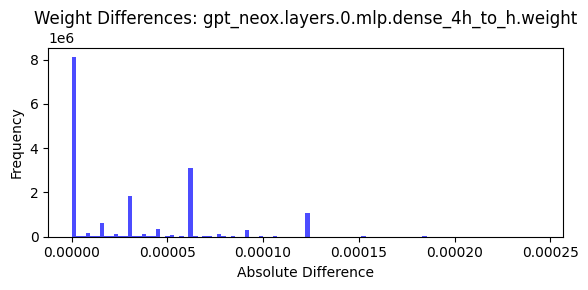

gpt_neox.layers.0.mlp.dense_4h_to_h.bias: Mean absolute diff = 0.000017


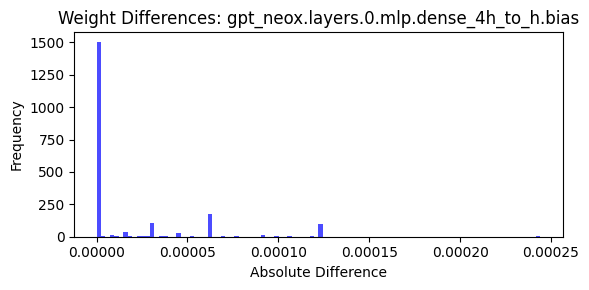

gpt_neox.layers.1.input_layernorm.weight: Mean absolute diff = 0.000000


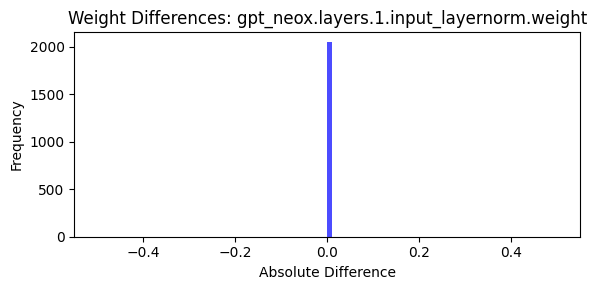

gpt_neox.layers.1.input_layernorm.bias: Mean absolute diff = 0.000013


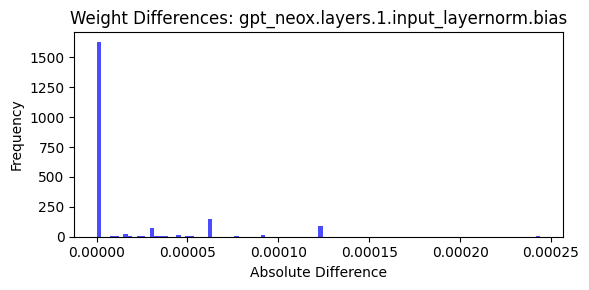

gpt_neox.layers.1.post_attention_layernorm.weight: Mean absolute diff = 0.000000


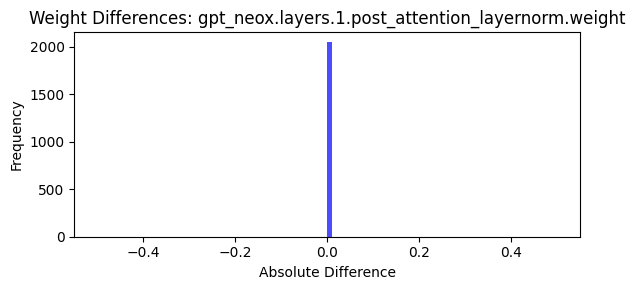

gpt_neox.layers.1.post_attention_layernorm.bias: Mean absolute diff = 0.000006


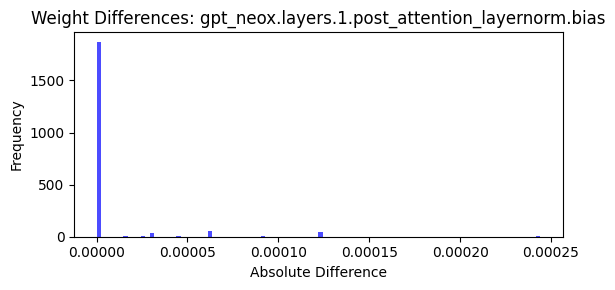

gpt_neox.layers.1.attention.query_key_value.weight: Mean absolute diff = 0.000026


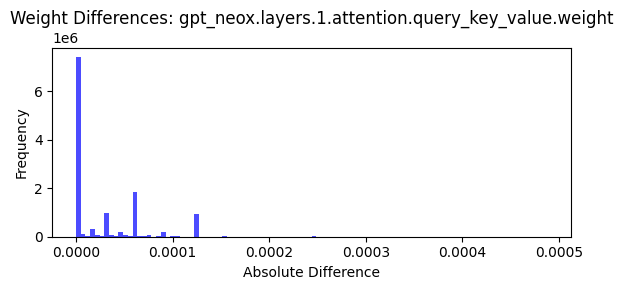

gpt_neox.layers.1.attention.query_key_value.bias: Mean absolute diff = 0.000020


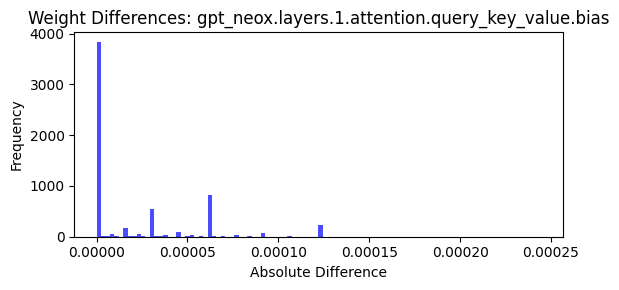

gpt_neox.layers.1.attention.dense.weight: Mean absolute diff = 0.000030


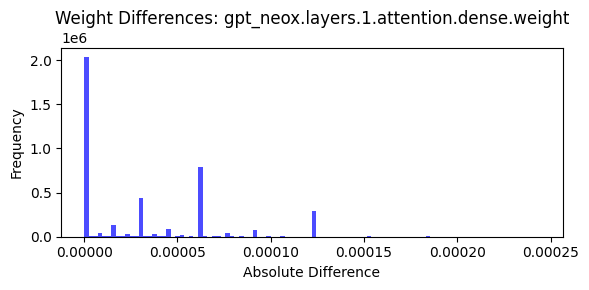

In [9]:
compare_weights_histograms(before_value_model, after_value_model, max_layers=20)

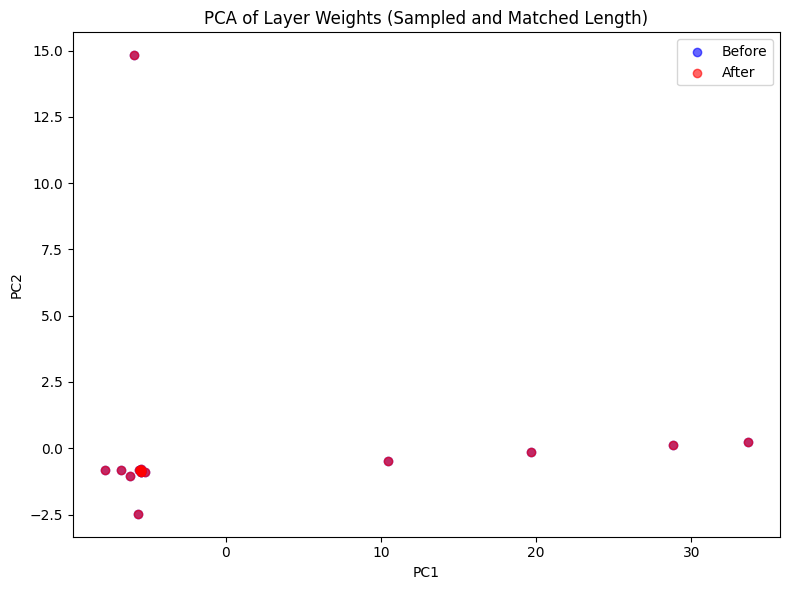

In [11]:
pca_weights_visualization(before_value_model, after_value_model, max_layers=20, sample_size=10000)